# **Load & save image**
## Table of Content
0. [Install package](#install)
1. [opencv](#cv)
2. [PIL](#pil)
3. [scikit-image](#ski)
4. [Efficiency compare](#ec)
5. [Load images from folder](#lff)

---
<a class="anchor" id="install"></a>
## 0. Install package
* [OpenCV documents](https://docs.opencv.org/4.5.4/index.html)
* [PIL documents](https://pillow.readthedocs.io/en/stable/)
* [scikit-image documents](https://scikit-image.org/docs/stable/)

In [ ]:
# Use terminal command in jupyter with "!".
!pip install numpy matplotlib time
!pip install Pillow
!pip install opencv-python
!pip install scikit-image

---
<a class="anchor" id="cv"></a>
## 1. Using OpenCV

* OpenCV load image as a **numpy ndarray** with **BGR** color mode. 
* If use **function of opencv**, transfer into the **BGR** mode first.
* If use **function of other image processing libriary**, transfer into the **RGB** mode first.

In [93]:
# Import library
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv

img//Ch01//ci3d.jpg


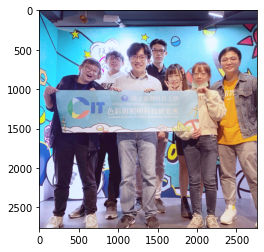

True

In [94]:
img_path = "img//Ch01//ci3d.jpg"

# Load image
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Turn BGR to RGB

# Show image
plt.imshow(img)
plt.show()

# Save image
cv.imwrite("img//Ch01//ci3d-cv-1.jpg", img) # if you forget to Turn color back to BGR, it will save image incorrectly;
cv.imwrite("img//Ch01//ci3d-cv-2.jpg", cv.cvtColor(img, cv.COLOR_RGB2BGR)) # RGB mode

---
<a class="anchor" id="pil"></a>
## 2. Using PIL (Pillow image library)
* PIL load image as a **PIL object**.
* To use PIL function, **DO NOT** transfer to **numpy ndarray**, use original **PIL object**.
* To transfer **PIL object** to **numpy ndarray**, use **np.array()** function.
* To transfer **numpy ndarray** to **PIL object**, use **Image.fromarray()** function.

In [95]:
# Import library
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image 

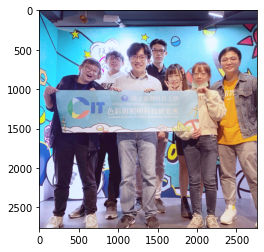

In [96]:
del img
img_path = "img//Ch01//ci3d.jpg"

# Load image
img = Image.open(img_path)
img = np.array(img)

# Show image
plt.imshow(img)
plt.show()

# Save image
img = Image.fromarray(img)
img.save("img//Ch01//ci3d-pil.jpg")

---
<a class="anchor" id="ski"></a>
## 3. Using skimage

* skimage load image as a **numpy ndarray** with **RGB** color mode.

In [97]:
# Import library
import numpy as np
import matplotlib.pyplot as plt 
from skimage import io

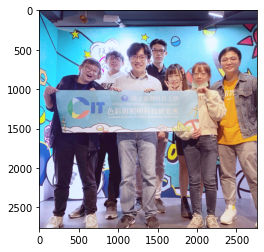

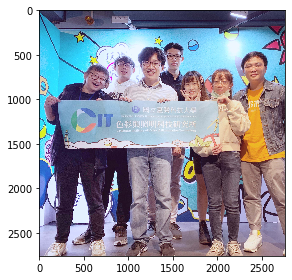

In [98]:
del img
img_path = "img//Ch01//ci3d.jpg"

# Load image
img = io.imread(img_path)

# Show image
plt.imshow(img)
plt.show()
io.imshow(img) # Use scikit-image imshow function

# Save image
io.imsave("img//Ch01//ci3d-ski.jpg", img)

---
<a class="anchor" id="ec"></a>
## 4. Efficiency compare

#### Result
* Load:
    **PIL** > skimage > cv2
* Save:
    **PIL** > cv2 > skimage
   
#### **PIL is the best!!**

In [99]:
# Import library
import numpy as np
import matplotlib.pyplot as plt 
import time
import cv2 as cv
from PIL import Image 
from skimage import io

In [100]:
# Load  test

del img
img_path = "img//Ch01//ci3d.jpg"

# OpenCV
time_cv = time.time()
for i in range(50):
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
time_cv = (time.time() - time_cv)/50

# PIL
del img
time_pil = time.time()
for i in range(50):
    img = Image.open(img_path)
    img = np.array(img)
time_pil = (time.time() - time_pil)/50

# scikit-image
del img
time_ski = time.time()
for i in range(50):
    img = io.imread(img_path)
time_ski = (time.time() - time_ski)/50

print("<Image load test>")
print("CV cost : {:.3f} s".format(time_cv))
print("PIL cost: {:.3f} s".format(time_pil))
print("SKI cost: {:.3f} s".format(time_ski))

<Image load test>
CV cost : 0.053 s
PIL cost: 0.037 s
SKI cost: 0.037 s


In [101]:
# Write test

del img
img_path = "img//Ch01//ci3d.jpg"
img_save_name = "img//Ch01//ci3d-test.jpg"

# Load image
img = Image.open(img_path)
img = np.array(img)

# OpenCV
time_cv = time.time()
for i in range(50):
    cv.imwrite(img_save_name, cv.cvtColor(img, cv.COLOR_RGB2BGR))
time_cv = (time.time() - time_cv)/50

# PIL
time_pil = time.time()
for i in range(50):
    Image.fromarray(img).save(img_save_name)
time_pil = (time.time() - time_pil)/50

# scikit-image
time_ski = time.time()
for i in range(50):
    io.imsave(img_save_name, img)
time_ski = (time.time() - time_ski)/50

print("<Image write test>")
print("CV cost : {:.3f} s".format(time_cv))
print("PIL cost: {:.3f} s".format(time_pil))
print("SKI cost: {:.3f} s".format(time_ski))

<Image write test>
CV cost : 0.084 s
PIL cost: 0.023 s
SKI cost: 0.111 s


---
<a class="anchor" id="lff"></a>
## 5. Load images from folder


In [102]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [103]:
folder = 'img//Ch01//many_imgs//'
imgs = []
for filename in os.listdir(folder):
    if filename.split('.')[-1] in ['png', 'jpg', 'jpeg']:
        imgs.append(np.array(Image.open(folder + filename)))
        

### Show many images

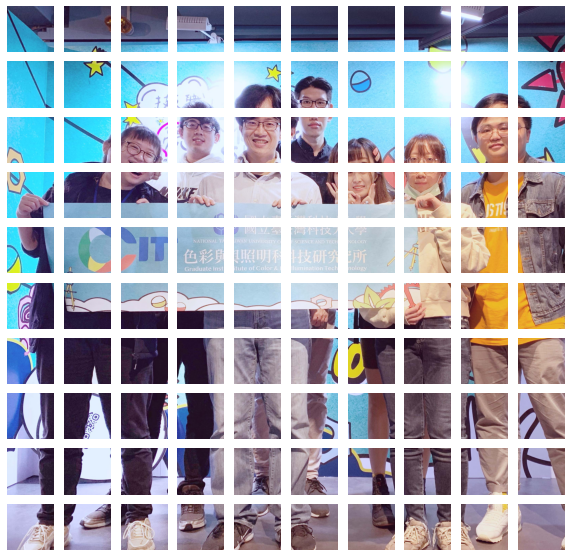

In [104]:
plt.figure(figsize=(10,10))
plt.subplot(10,10,1)

for i in range(10):
    for j in range(10):
        plt.subplot(10,10,i*10+j+1)
        plt.axis('off')
        plt.imshow(imgs[i*10+j])
plt.show()